# Gradient Descent

This Jupyter notebook demonstrates the implementation and visualization of the gradient descent algorithm, a key optimization technique in machine learning.


Stopping early due to tolerance: Iteration 66


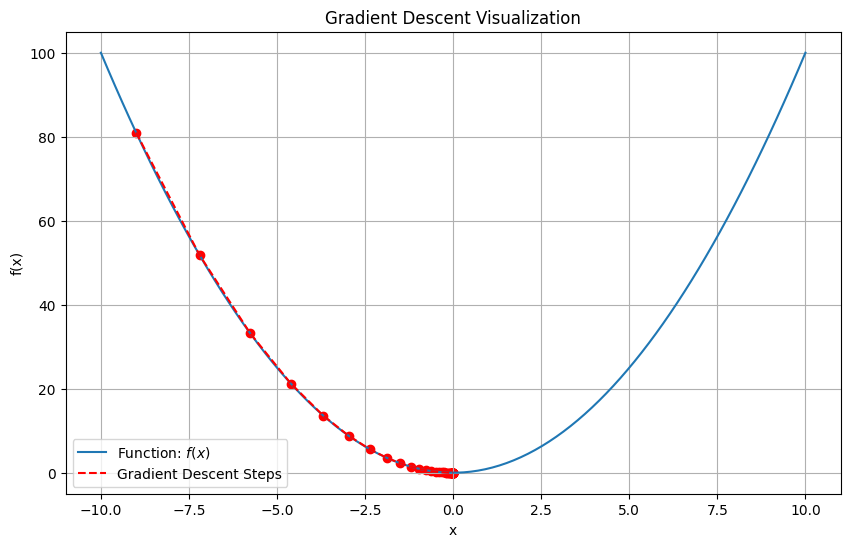

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    """
    Compute a function given the input value.
    
    Parameters:
        x (float): The input value.
    """
    return x**2 

def numerical_derivative(f, x, h=1e-5):
    """
    Compute the numerical derivative of a function at a given point.
    
    Parameters:
        f (callable): The function for which the derivative is to be calculated.
        x (float): The point at which the derivative is calculated.
        h (float, optional): The step size used for the central difference. Default is 1e-5.
        
    Returns:
        float: The approximate derivative of the function at point x.
    """
    return (f(x + h) - f(x - h)) / (2 * h)

def run_gradient_descent(f, alpha, x_start, n_iterations=100, tolerance=1e-6):
    """
    Perform gradient descent to find the minimum of a function.
    
    Parameters:
        f (callable): The function to minimize.
        alpha (float): The learning rate.
        x_start (float): The initial point from which to start the gradient descent.
        n_iterations (int, optional): The maximum number of iterations. Default is 100.
        tolerance (float, optional): The tolerance for convergence. Default is 1e-6.
        
    Returns:
        tuple: Two lists containing the x values and the corresponding f(x) values at each step.
    """
    x = x_start
    x_history = [x]
    y_history = [f(x)]

    for _ in range(n_iterations):
        grad = numerical_derivative(f, x)
        x_new = x - alpha * grad
        x_history.append(x_new)
        y_history.append(f(x_new))
        
        if abs(x_new - x) < tolerance:
            print(f"Stopping early due to tolerance: Iteration {_+1}")
            break
        
        x = x_new

    return x_history, y_history

x = np.linspace(-10, 10, 100)
y = f(x)

x_history, y_history = run_gradient_descent(f, alpha=0.1, x_start=-9)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Function: $f(x)$')
plt.scatter(x_history, y_history, color='red')
plt.plot(x_history, y_history, 'r--', label='Gradient Descent Steps')
plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()